In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computing

import matplotlib.pyplot as plt  # For data visualization
import matplotlib.style as style  # For customizing plot styles
plt.style.use('classic')

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# importing seaborn for statistical plots
import seaborn as sns  # For enhanced statistical graphics

In [2]:
mpg_df = pd.read_csv("./../Dataset/car-mpg.csv")

In [3]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [5]:
mpg_df.car_type.unique()

array([0, 1], dtype=int64)

In [130]:
mpg_df.hp.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [132]:
mpg_df['hp'] = mpg_df['hp'].replace('?', np.nan) # replacing  '?' with nan

In [134]:
mpg_df['hp'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [136]:
mpg_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [138]:
#replacing null value with median
mpg_df['hp'] = mpg_df['hp'].fillna(mpg_df['hp'].median())

In [140]:
mpg_df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [103]:
# Convert 'hp' column to numeric
mpg_df['hp'] = pd.to_numeric(mpg_df['hp'], errors='coerce')

In [13]:
mpg_df.shape

(398, 10)

In [144]:
mpg_df['car_name'].value_counts()

KeyError: 'car_name'

In [15]:
mpg_df_copy = mpg_df.copy() # taking a copy of data

In [16]:
mpg_df.drop('car_name', axis=1, inplace=True)

In [17]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0


### Bivariate

##### we draw paiplot to see relation b/w two columns

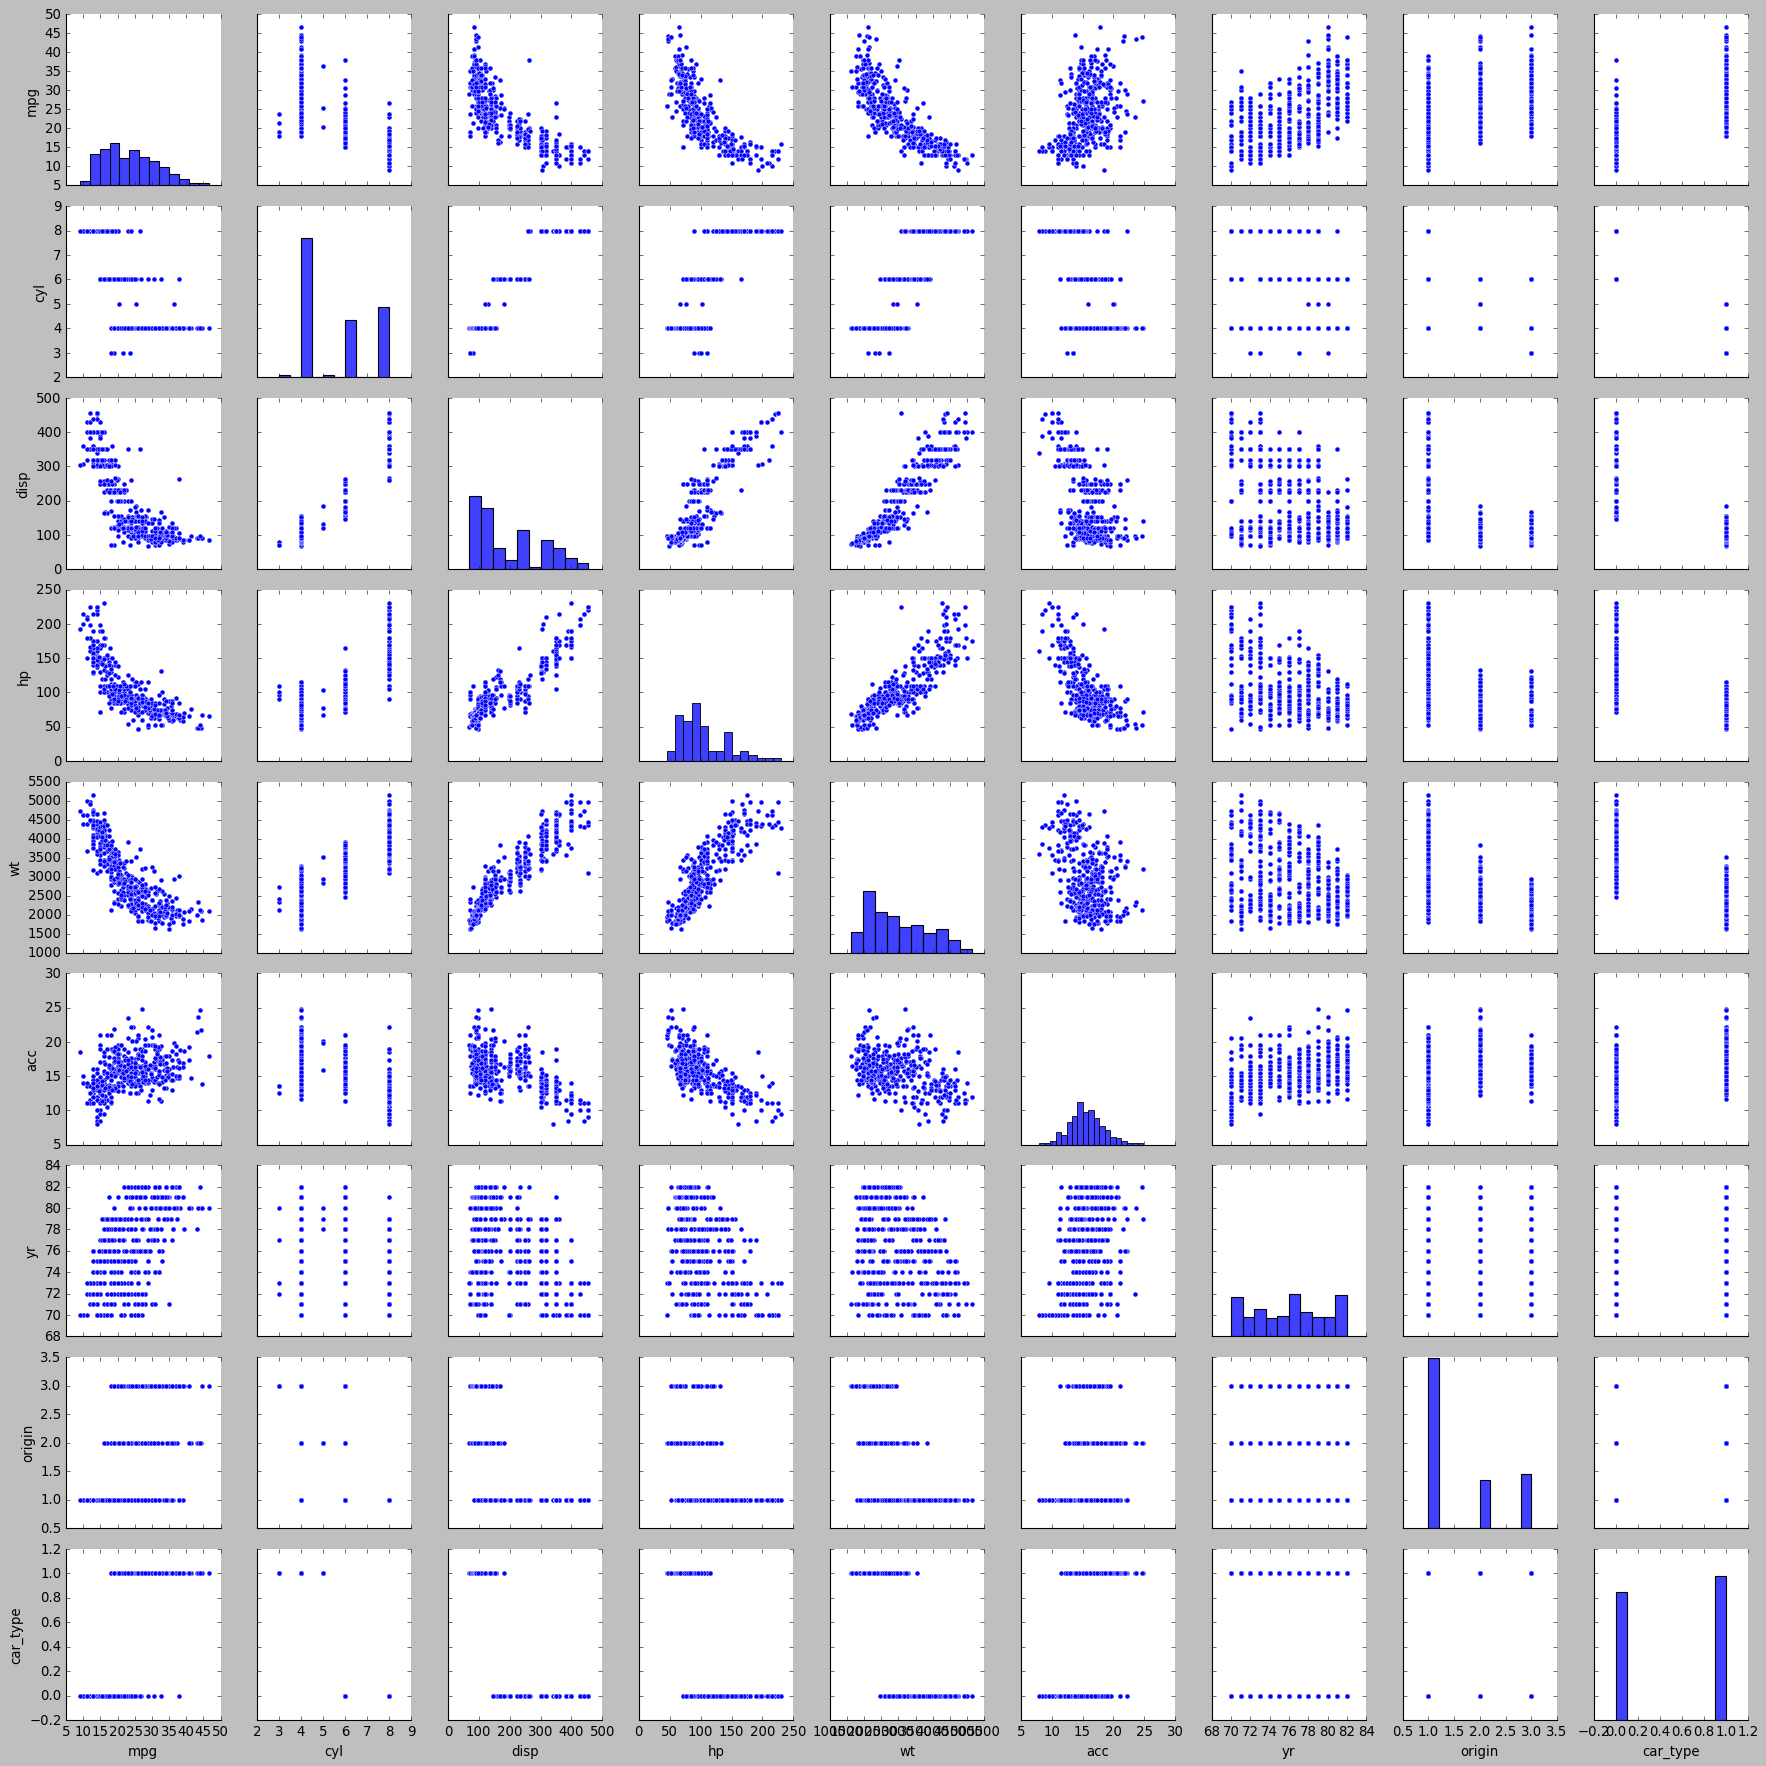

In [20]:
sns.pairplot(mpg_df)

In [21]:
mpg_df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type'], dtype='object')

In [142]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [23]:
corr_mat = mpg_df.corr()

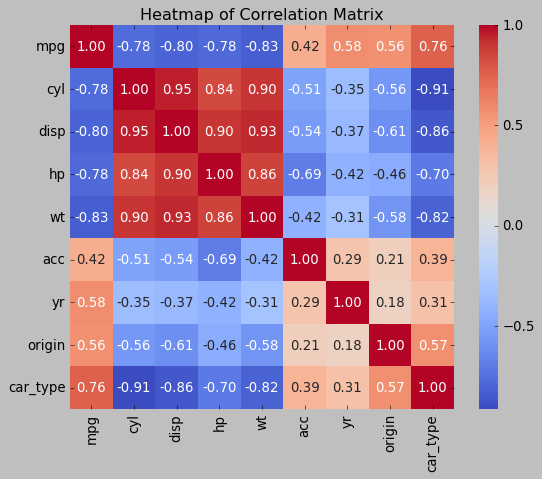

In [24]:
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
# Show the plot
plt.title('Heatmap of Correlation Matrix')
plt.show()

<Axes: >

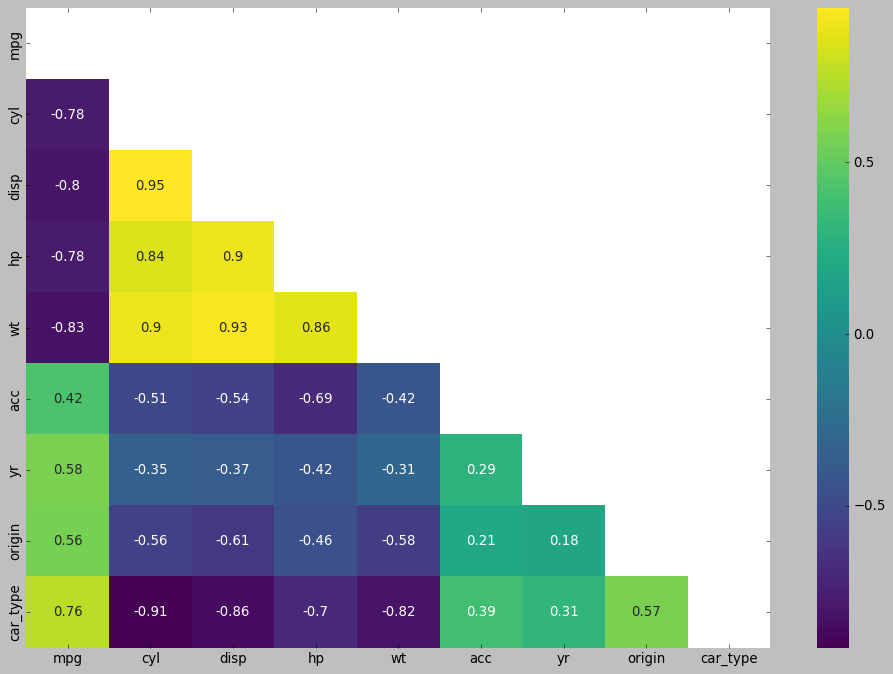

In [25]:
plt.figure(figsize=(15, 10))
mask_ut = np.triu(np.ones_like(corr_mat, dtype = bool))
sns.heatmap(corr_mat, annot=True, cmap="viridis", mask = mask_ut)

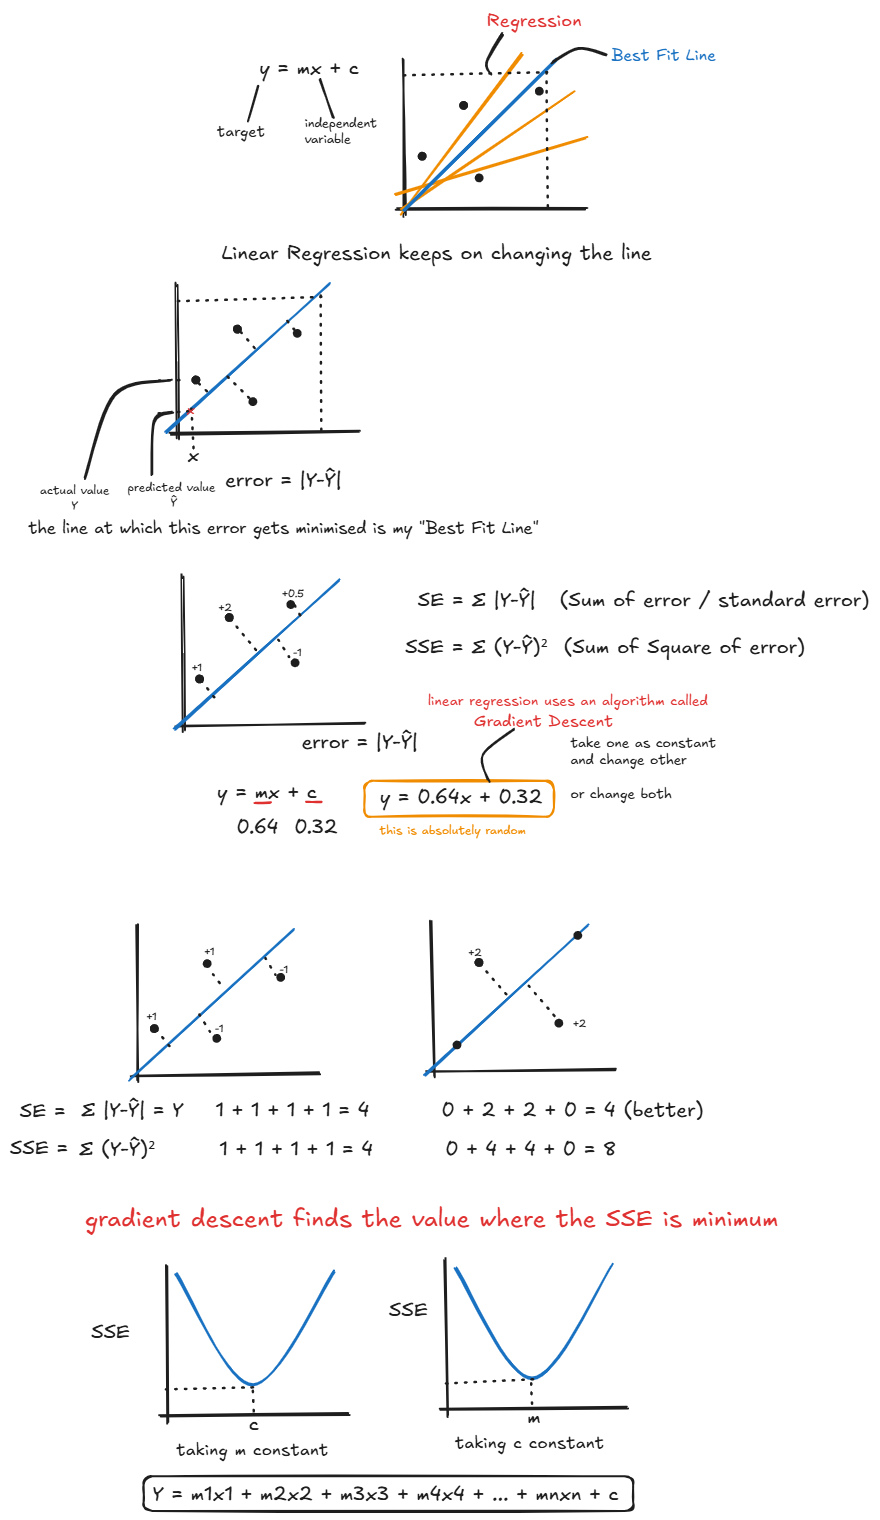

In [29]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [31]:
mpg_df.origin.unique()

array([1, 3, 2], dtype=int64)

In [33]:
mpg_df.car_type.unique()

array([0, 1], dtype=int64)

# Creating Train & Test Data

In [37]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [146]:
x = mpg_df.drop('mpg', axis=1)

In [148]:
y = mpg_df[['mpg']]

In [150]:
x.head()

,cyl,disp,hp,wt,acc,yr,origin,car_type
0,8,307.0,130.0,3504,12.0,70,1,0
1,8,350.0,165.0,3693,11.5,70,1,0
2,8,318.0,150.0,3436,11.0,70,1,0
3,8,304.0,150.0,3433,12.0,70,1,0
4,8,302.0,140.0,3449,10.5,70,1,0


In [152]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [156]:
train_test_split(x, y, test_size=0.30, random_state=1)

[     cyl   disp     hp    wt   acc  yr  origin  car_type
 350    4  105.0   63.0  2215  14.9  81       1         1
 59     4   97.0   54.0  2254  23.5  72       2         1
 120    4  121.0  112.0  2868  15.5  73       2         1
 12     8  400.0  150.0  3761   9.5  70       1         0
 349    4   91.0   68.0  1985  16.0  81       3         1
 ..   ...    ...    ...   ...   ...  ..     ...       ...
 393    4  140.0   86.0  2790  15.6  82       1         1
 255    4  140.0   88.0  2720  15.4  78       1         1
 72     8  304.0  150.0  3892  12.5  72       1         0
 235    4   97.0   75.0  2265  18.2  77       3         1
 37     6  232.0  100.0  3288  15.5  71       1         0
 
 [278 rows x 8 columns],
      cyl   disp     hp    wt   acc  yr  origin  car_type
 174    6  171.0   97.0  2984  14.5  75       1         0
 359    4  141.0   80.0  3230  20.4  81       2         1
 250    8  318.0  140.0  3735  13.2  78       1         0
 274    5  131.0  103.0  2830  15.9  78      

In [158]:
x_train.shape

(278, 8)

In [160]:
y_train.shape

(278, 1)

In [162]:
x_test.shape

(120, 8)

In [164]:
y_test.shape

(120, 1)

## Build Linear Regression Model

In [167]:
lin_reg = LinearRegression()

In [169]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [174]:
lin_reg.intercept_

array([-28.91612531])

In [176]:
lin_reg.coef_

array([[ 1.59692834e+00,  2.02591217e-02, -4.73230130e-02,
        -6.32057318e-03,  3.99458933e-02,  7.63632199e-01,
         1.02869281e+00,  6.35262612e+00]])

In [184]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg.coef_[0][idx]))

The coefficient for cyl is 1.5969283447242697
The coefficient for disp is 0.020259121675607717
The coefficient for hp is -0.04732301299607499
The coefficient for wt is -0.006320573176215296
The coefficient for acc is 0.03994589331799193
The coefficient for yr is 0.7636321989871581
The coefficient for origin is 1.0286928109659665
The coefficient for car_type is 6.352626121574743


#### Model Evaluation

In [189]:
# score on train data
lin_reg.score(x_train, y_train)

0.8320223843816397

In [191]:
# score on test data
lin_reg.score(x_test, y_test)

0.8534943560564747

In [193]:
#### Mean Square Error
mse = np.mean((lin_reg.predict(x_test)-y_test)**2)

In [195]:
mse

8.56573693828353

In [199]:
# predict mileage (mpg) for a set of attributes not in the training or test data
y_pred = lin_reg.predict(x_test)

In [201]:
x_test

,cyl,disp,hp,wt,acc,yr,origin,car_type
174,6,171.0,97.0,2984,14.5,75,1,0
359,4,141.0,80.0,3230,20.4,81,2,1
250,8,318.0,140.0,3735,13.2,78,1,0
274,5,131.0,103.0,2830,15.9,78,2,1
283,6,232.0,90.0,3265,18.2,79,1,0
...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,3,1
39,8,400.0,175.0,4464,11.5,71,1,0
171,4,134.0,96.0,2702,13.5,75,3,1
271,4,156.0,105.0,2745,16.7,78,1,1


In [203]:
y_pred

array([[19.55915514],
       [27.20594792],
       [21.18842964],
       [27.5694319 ],
       [22.55247019],
       [16.92702709],
       [29.66397778],
       [35.36742471],
       [18.91718981],
       [11.26875998],
       [30.91028268],
       [18.84695867],
       [19.85556939],
       [26.00491861],
       [37.20271628],
       [22.93284064],
       [10.62530559],
       [18.7712294 ],
       [ 9.11425082],
       [33.88266918],
       [26.59643222],
       [31.27252242],
       [19.46557122],
       [26.045283  ],
       [26.56577034],
       [29.92877261],
       [33.22100396],
       [33.82163154],
       [16.45505611],
       [30.5179869 ],
       [24.81437213],
       [ 9.968564  ],
       [21.12706804],
       [29.07920457],
       [25.86805235],
       [14.04725669],
       [27.58997983],
       [ 8.34961426],
       [32.18825258],
       [25.26092396],
       [25.26539027],
       [25.49508122],
       [22.21966394],
       [33.08628918],
       [23.5335173 ],
       [20

In [215]:
data = {
    'cyl': [10, 8, 12],
    'disp': [224, 332, 229],
    'hp': [113, 156, 542],
    'wt': [2781, 2341, 2623],
    'acc': [12, 15, 18],
    'yr': [75, 88, 91],
    'origin': [1, 2, 2],
    'car_type': [1, 0, 1]
}

In [217]:
x_sample = pd.DataFrame(data)

In [219]:
x_sample

,cyl,disp,hp,wt,acc,yr,origin,car_type
0,10,224,113,2781,12,75,1,1
1,8,332,156,2341,15,88,2,0
2,12,229,542,2623,18,91,2,1


In [221]:
y_sample_pred = lin_reg.predict(x_sample)
y_sample_pred

array([[33.7992715 ],
       [38.26268555],
       [31.27798514]])

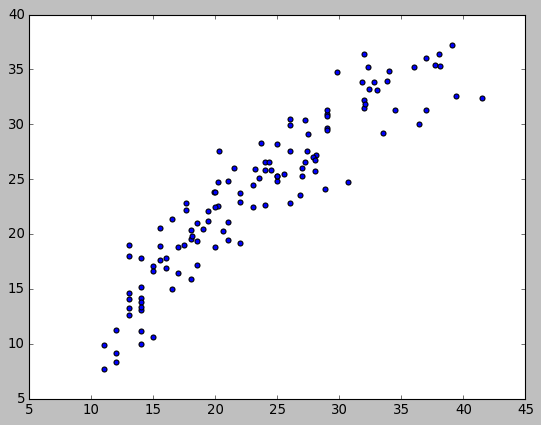

In [224]:
plt.scatter(y_test['mpg'], y_pred)

#### Limitation overcome by scaling

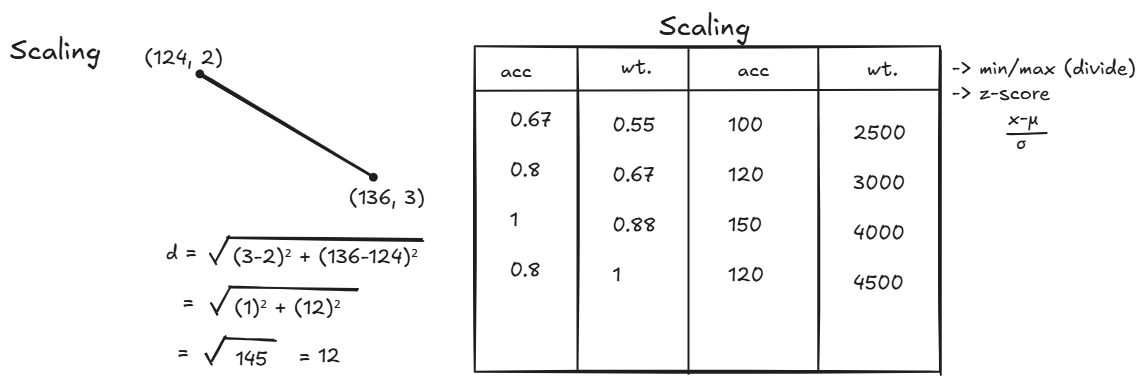

### Running the model on Scaled Data

In [237]:
from scipy.stats import zscore

X_train_scaled = x_train.apply(zscore)
X_test_scaled = x_test.apply(zscore)

y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [239]:
X_train_scaled

,cyl,disp,hp,wt,acc,yr,origin,car_type
350,-0.839201,-0.840956,-1.069209,-0.870115,-0.290766,1.402949,-0.709870,0.930469
59,-0.839201,-0.919296,-1.308973,-0.823934,2.809873,-1.036369,0.539142,0.930469
120,-0.839201,-0.684276,0.236170,-0.096885,-0.074442,-0.765334,0.539142,0.930469
12,1.553597,2.047826,1.248505,0.960534,-2.237679,-1.578440,-0.709870,-1.074727
349,-0.839201,-0.978051,-0.936007,-1.142462,0.105827,1.402949,1.788155,0.930469
...,...,...,...,...,...,...,...,...
393,-0.839201,-0.498219,-0.456480,-0.189246,-0.038388,1.673985,-0.709870,0.930469
255,-0.839201,-0.498219,-0.403199,-0.272134,-0.110496,0.589843,-0.709870,0.930469
72,1.553597,1.107748,1.248505,1.115653,-1.156060,-1.036369,-0.709870,-1.074727
235,-0.839201,-0.919296,-0.749524,-0.810909,0.899014,0.318808,1.788155,0.930469


In [242]:
y_train_scaled 

,mpg
350,1.409868
59,-0.076305
120,-0.584399
12,-1.092492
349,1.333654
...,...
393,0.431788
255,0.190444
72,-1.092492
235,0.304765


In [244]:
lin_reg.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [246]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg.coef_[0][idx]))

print("The intercept is {}".format(lin_reg.intercept_[0]))

The coefficient for cyl is 0.3390961824704705
The coefficient for disp is 0.2627915493773343
The coefficient for hp is -0.22563964773344244
The coefficient for wt is -0.6780231662387901
The coefficient for acc is 0.014073527686455515
The coefficient for yr is 0.3578835922892355
The coefficient for origin is 0.10461704574213032
The coefficient for car_type is 0.4024204398657049
The intercept is -2.723325045225982e-17


### Scaled model Evaluation

In [249]:
lin_reg.score(X_test_scaled, y_test_scaled)

0.8596572401677918

In [274]:
lin_reg.score(X_train_scaled, y_train_scaled)

0.8320223843816397

In [253]:
X_sample_scaled = x_sample.apply(zscore)
Y_sample_pred = lin_reg.predict(X_sample_scaled)
Y_sample_pred

array([[-1.13628041],
       [ 0.66304313],
       [ 0.47323728]])

### Ridge Linear Regression

In [258]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [262]:
# Ridge Linear Regression
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge model:", ridge.coef_)

Ridge model: [[ 1.52955226  0.02041825 -0.04645482 -0.00634288  0.04059029  0.7644066
   1.03165638  6.1579333 ]]


In [266]:
ridge.score(x_train, y_train)

0.831999778263755

In [297]:
# Ridge Linear Regression
ridge = Ridge(alpha=0.3)
ridge.fit(X_train_scaled, y_train_scaled)
print("Ridge model:", ridge.coef_)

Ridge model: [[ 0.33309004  0.25406973 -0.22509887 -0.66925214  0.0125066   0.35703057
   0.10422519  0.39762349]]


In [299]:
ridge.score(X_train_scaled, y_train_scaled)

0.8320089160349395

In [301]:
ridge.score(X_test_scaled, y_test_scaled)

0.8599903158169635

In [310]:
# Ridge Linear Regression
ridge = Ridge(alpha=5.7)
ridge.fit(x_train, y_train)
print("Ridge model:", ridge.coef_)

ridge.score(x_test, y_test)

Ridge model: [[ 0.79941744  0.02171865 -0.03665224 -0.00659152  0.04675639  0.77247291
   1.04131118  3.99366674]]


0.8570024761081263

### Lasso Regression Model

In [314]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
print("Lasso model : ", (lasso.coef_))

Lasso model :  [ 0.14015939  0.0247552  -0.03194847 -0.00662762  0.01844773  0.76706048
  0.88467571  2.84997535]


In [316]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.8237410103096234
0.8546131525618755


In [328]:
lasso = Lasso(alpha = 0.007)
lasso.fit(X_train_scaled, y_train_scaled)
print("Lasso model : ", (lasso.coef_))

Lasso model :  [ 0.2414611   0.09421669 -0.15848732 -0.58411954  0.          0.34689526
  0.08149326  0.30668483]


In [330]:
print(lasso.score(X_train_scaled, y_train_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.8281007274530284
0.8625370865744535


##### train & test accuracy are close to each other

In [341]:
# Define a list of alpha values to try
list_of_alphas = [.001, 0.112, 0.002, 0.003, .004, .005, .006]

# Iterate through the list of alpha values
for alpha in list_of_alphas:
    # Create a Lasso regression model with the current alpha value
    lasso = Lasso(alpha=alpha)
    # Fit the model to the training data
    lasso.fit(x_train, y_train)
    # Print the accuracy of the model on the test data
    print("The Accuracy of the model with alpha = {} is {}".format(alpha, lasso.score(x_test, y_test)))
    print()

The Accuracy of the model with alpha = 0.001 is 0.8536072786642025

The Accuracy of the model with alpha = 0.112 is 0.8534828673324413

The Accuracy of the model with alpha = 0.002 is 0.8537181589412621

The Accuracy of the model with alpha = 0.003 is 0.8538280232174231

The Accuracy of the model with alpha = 0.004 is 0.8539348385769044

The Accuracy of the model with alpha = 0.005 is 0.8540395470053767

The Accuracy of the model with alpha = 0.006 is 0.8541421993227732

